# Seminar: Exploratory Data Analysis in Python/Pandas environment

* We will use the Ames Housing dataset of real estate sales
* The content is based on the Kaggle Competition House Prices Advanced Regression Techniques. See details [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques).

### Goals for today:
* Read files (csv)
* Display needed parts of df
* Aggregate df
* Filter df

In [28]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

## Task 1: Read data and undestand it's structure

### 1a. Load training dataset (in `./data/train.csv`) and display 5 random rows

Hint: Use `.style` attribute to display all columns

Hint: See  `./data/data_description.txt` for documentation of variables

In [13]:
data = pd.read_csv('train.csv', sep = ',')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [23]:
data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [29]:
data.sample(5).style #random and style for displaying all columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
939,940,70,RL,nan,24090,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,7,1940,1950,Gable,CompShg,MetalSd,MetalSd,nan,0.000000,TA,Gd,CBlock,TA,TA,Mn,Unf,0,Unf,0,1032,1032,GasA,Ex,Y,SBrkr,1207,1196,0,2403,0,0,2,0,4,1,TA,10,Typ,2,TA,Attchd,1940.000000,Unf,1,349,TA,TA,Y,56,0,318,0,0,0,nan,nan,nan,0,6,2010,COD,Normal,244400
770,771,85,RL,nan,7252,Pave,nan,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SFoyer,5,5,1982,1982,Hip,CompShg,Wd Sdng,Wd Sdng,nan,0.000000,TA,TA,CBlock,Gd,TA,Av,GLQ,685,Unf,0,173,858,GasA,TA,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,5,Typ,0,nan,Detchd,1983.000000,Unf,2,576,TA,TA,Y,120,0,0,0,0,0,nan,nan,nan,0,4,2009,WD,Normal,134900
234,235,60,RL,nan,7851,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,nan,nan,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.000000,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,nan,nan,nan,0,5,2010,WD,Normal,216500
1048,1049,20,RL,100.000000,21750,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,4,1960,2006,Hip,CompShg,HdBoard,HdBoard,BrkFace,75.000000,TA,Fa,Slab,nan,nan,nan,nan,0,nan,0,0,0,GasA,TA,Y,SBrkr,1771,0,0,1771,0,0,1,0,3,1,TA,9,Min1,1,TA,Attchd,1960.000000,Unf,2,336,TA,TA,Y,0,0,0,0,0,0,nan,GdPrv,nan,0,11,2009,WD,Normal,115000
321,322,60,RL,99.000000,12099,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,388.000000,Gd,TA,PConc,Ex,TA,Av,GLQ,970,Unf,0,166,1136,GasA,Ex,Y,SBrkr,1136,1332,0,2468,1,0,2,1,4,1,Gd,10,Typ,1,Gd,BuiltIn,2004.000000,Fin,3,872,TA,TA,Y,184,154,0,0,0,0,nan,nan,nan,0,6,2007,WD,Normal,354000


### 1b. What is the distribution `SalePrice` variable?

* plot histogram (`.hist()` on `pd.Series`) with bin width $10,000

Hint: Specify bins using range

<Axes: >

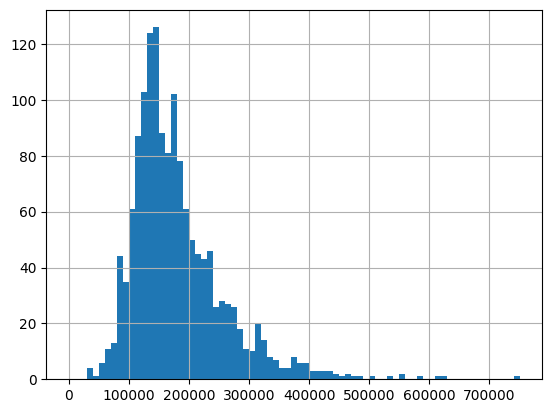

In [33]:
SalePrice = data['SalePrice']
#SalePrice.hist(bins = int((SalePrice.max() - SalePrice.min()) / 10000) + 1 ,range = (SalePrice.min(), SalePrice.max()))
SalePrice.hist(bins = range(0,SalePrice.max(), 10000))

### 1c. Split columns between quantitative and qualitative variables
Store column names in separate lists of strings `quantitative` and `qualitative`

Hint: `.dtypes` attribute contains a series with strings describing dtype of the data

In [34]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [35]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 1c* displace df with only quantitative columns

In [47]:
data[quantitative]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


### 1d. Are `dtype`s correct? 

* visually check whether all the columns look correctly parsed

### 1e. Plot number of missing data for all columns

<Axes: >

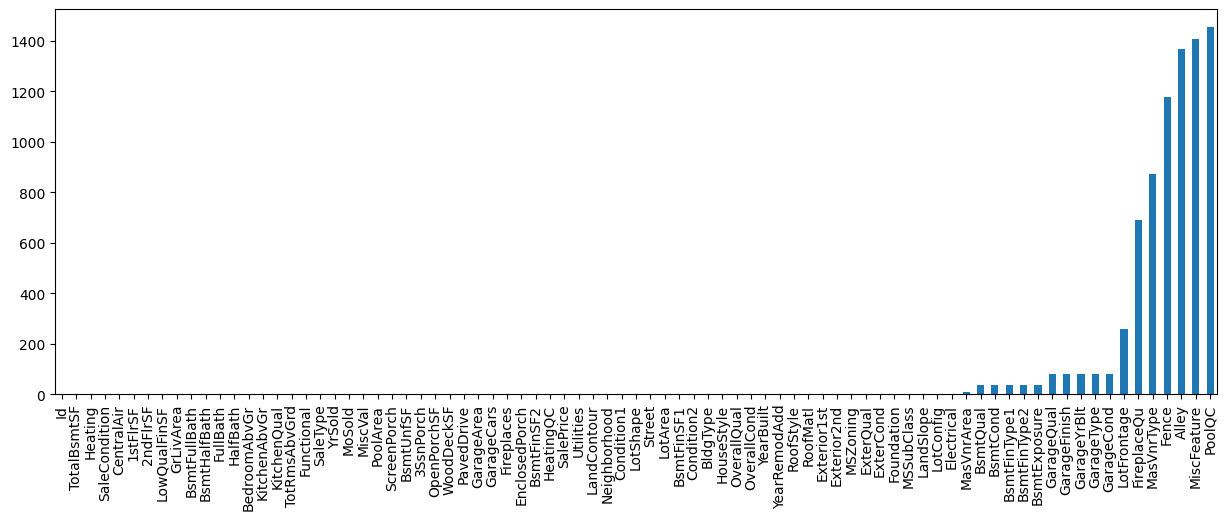

In [54]:
data.isna().sum().sort_values().plot.bar(figsize = (15,5))

### For the better visiability drop columns with no missing data

<Axes: >

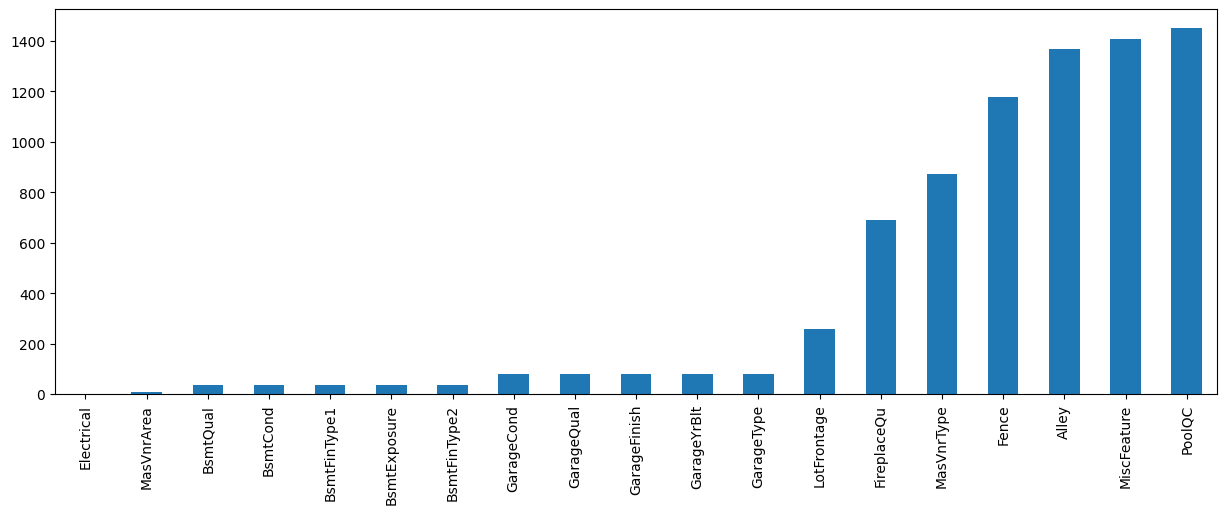

In [62]:
missing_values = [i for i in data.columns if data[i].isna().sum()>0]
data[missing_values].isna().sum().sort_values().plot.bar(figsize = (15,5))

## Task 2: Aggregation

### 2.1 Calculate the average LotArea for each year (YrSold)

In [63]:
set(data['SaleCondition'])

{'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Normal', 'Partial'}

In [66]:
#groupby is powerful
data[['SaleCondition','SalePrice']].groupby("SaleCondition").count()

,SalePrice
SaleCondition,
Abnorml,101
AdjLand,4
Alloca,12
Family,20
Normal,1198
Partial,125


### 2.2 Calculate the average SalePrice for each street (Street)

In [70]:
#groupby is powerful
data[['Street','SalePrice']].groupby("Street").mean()
data.groupby("Street")[['SalePrice']].mean().reset_index()

,Street,SalePrice
0,Grvl,130190.500000
1,Pave,181130.538514


### 2.2 Calculate the average SalePrice for Grvl street (Street)

### 2.3 Calculate the average SalePrice for Grvl street (Street) But! Take into account only flats which cost more than 300000

## Task 3 Filtering

### 3.1 How many flats cost less than 200000 and have a 'Normal' condition (column SaleCondition)

In [75]:
data[(data.SalePrice < 200000) & (data.SaleCondition == 'Normal')].count()

Id               872
MSSubClass       872
MSZoning         872
LotFrontage      706
LotArea          872
                ... 
MoSold           872
YrSold           872
SaleType         872
SaleCondition    872
SalePrice        872
Length: 81, dtype: int64

### 3.2 How many flats cost less than 200000 or have a 'Normal' condition (column SaleCondition)

In [76]:
data[(data.SalePrice < 200000) | (data.SaleCondition == 'Normal')].count()

Id               1351
MSSubClass       1351
MSZoning         1351
LotFrontage      1099
LotArea          1351
                 ... 
MoSold           1351
YrSold           1351
SaleType         1351
SaleCondition    1351
SalePrice        1351
Length: 81, dtype: int64

### 3.3 How many flats cost have more areas on the second floor(2ndFlrSF) then on the first one(1stFlrSF)?

### What is the average cost (in thousands) for such type of the flats?

# BONUSES

## Task 1: Study relationships between variables

### 1a. see correlation matrix

In [ ]:
fig=plt.subplots(1,1,figsize=(15,12))
sns.heatmap(df[quantitative].corr(),vmin=-1,cmap='coolwarm',annot=True,fmt='0.1f')

### 2b. Boxplots for categorical variables

In [ ]:
sns.boxplot(data=df,x='MSZoning',y='SalePrice')

## Task 2: ANOVA disparity estimations 

### One-way ANOVA 
* Question: Do sale prices differ across categories of certain feature?
* Test: Do price means across factors with a feature differ in their underlying distribution? 
* Are prices of houses with pool drawn from distribution with different mean than prices of house without a pool? 

* We will test this on all features and plot results

### 2a. Function for estimating ANOVA for one feature
* Your task is to complete a following snippet:


```python

 def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether all levels of `qualitative` series are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    
    Uses `scipy.stats.f_oneway` to deliver the test.

    Returns pd.Series with `statistic`, `p_value` and `disparity` measure. `statistic` and `p_value` are calculated by `scipy.stats.f_oneway`. Disparity is calculated as 1/log(p_value).
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor] for factor in qualitative_series.fillna('MISSING').unique()
    }

    anova_result =  stats.f_oneway(*samples.values())
    
    pass
```

In [ ]:
def anova_feature(qualitative_series, quantitative_series):
    '''
    Performs One-way ANOVA testing whether `quantitative_series` across levels of `qualitative_series` are drawn from distributions with equal means

    Expects:
    - 'qualitative_series': Series with categorical data delienating indivudal groups
    - 'quantitative_series': Series with value data on which the distribution is tested
    

    Returns Series with test statistic, p-value
    '''
    samples =  {
        factor: quantitative_series.loc[qualitative_series.fillna('MISSING') == factor]for factor in qualitative_series.fillna('MISSING').unique()
    }

    statistic, pvalue =  stats.f_oneway(*samples.values())
    
    return pd.Series({
        'statistic':statistic,
        'p_value':pvalue,
        'disparity': math.log(1./pvalue)
    })

anova_feature(df.MasVnrType, df.SalePrice)

### 2b. Generate dataframe with ANOVA test of all quantitative columns on `SalePrice` in the dataset

In [ ]:
anova = pd.DataFrame({
    col: anova_feature(df[col],df.SalePrice) for col in qualitative
}).T
anova

### 2c. Plot the disparity measure

In [ ]:
anova.disparity.sort_values(ascending=False).plot.bar(figsize=(12,3))

## Task 3: Encode qualitative variables as quantitative
### 3a. Feature-level function

* Write a function that  an input dataframe with encoded version
* Complete the following snippet

In [ ]:
def encode_qualitative_feature(quantitative_series, qualitative_series, sorting_function=np.mean,suffix='_E'):
    '''
    Ranks `qualitative_series` according to sorting function applied on `quantitative_series` and return its rank as a series. 
    
    Series name is extended with `suffix`.
    '''
    encode_df = pd.DataFrame({
        quantitative_series.name:quantitative_series,
        qualitative_series.name:qualitative_series 
    })

    sorting = encode_df.groupby(qualitative_series.name)[quantitative_series.name].apply(np.mean).rank()

    return qualitative_series.map(sorting).rename(f'{qualitative_series.name}{suffix}')

In [ ]:
encode_qualitative_feature(df.SalePrice, df.KitchenQual)

## 3b. Apply on all qualitative features


In [ ]:
def encode_columns(df, columns, sorting_function=np.mean,suffix='_E'):
    for col in columns:
        ranked_col = encode_qualitative_feature(df.SalePrice, df[col])
        df[ranked_col.name] = ranked_col

    return df

df_encoded =encode_columns(df.copy(), qualitative, sorting_function=np.mean,suffix='_E')
df_encoded